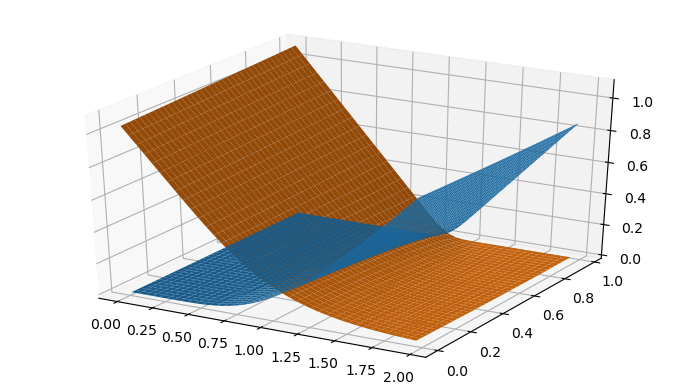

In [36]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,4), dpi=100)
ax = plt.axes(projection='3d')

# Data
T = 1;K = 1.1;r = 0.05;
q = 0.02;sigma = 0.4;
S = np.arange(0.01,2,0.05)
t = np.arange(0,T,0.025)
S,t = np.meshgrid(S,t)
dt = T-t
numerator1 = np.log(S/K) + (r-q+((sigma**2)/2))*dt
numerator2 = np.log(S/K) + (r-q-((sigma**2)/2))*dt
denominator = sigma*np.sqrt(T-t)
d1 = numerator1/denominator
d2 = numerator2/denominator

#Call
F1_1 = norm.cdf(d1)
F1_2 = norm.cdf(d2)
Vc = S*np.exp(-q*(dt))*F1_1 - K*np.exp(-r*dt)*F1_2

#Put
F2_1 = norm.cdf(-d2)
F2_2 = norm.cdf(-d1)
Vp = K*np.exp(-r*(dt))*F2_1 - S*np.exp(-q*dt)*F2_2

# Plot
surf = ax.plot_surface(S,t,Vc)
surf = ax.plot_surface(S,t,Vp)
plt.tight_layout()
plt.show()